<a href="https://colab.research.google.com/github/taylan-sen/CIS490/blob/main/OpenCV_colab_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original material from https://www.aiismath.com

# OpenCV Colab Intro

## Introduction
OpenCV (Open Source Computer Vision) is an open source computer vision software library with interfaces for C++ and python. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception.
[https://opencv.org/about/]

<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/OpenCV_Logo_with_text_svg_version.svg" alt="opencv logo" width="100"/>

## Basic usage


In [1]:
import sys  # this module allows us to see what modules have been loaded
import matplotlib.pyplot as plt
import cv2  # opencv for python package

figsize = (6, 6) # lets set up a default figure size


In [2]:
# Grab some raw images using subversion to run in google colab
if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_01_intro_to_CV_and_Python/Lenna.png".split()
    )
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_01_intro_to_CV_and_Python/opencv_logo.png".split()
    )



This is how to read and plot an image with opencv



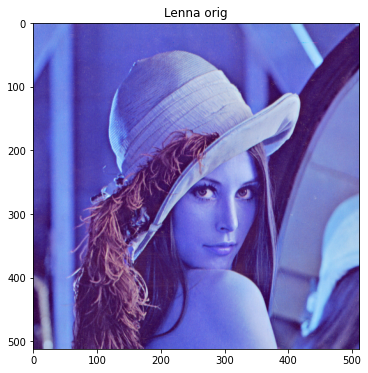

In [3]:
img_raw = cv2.imread("Lenna.png")
plt.figure(figsize=figsize)
plt.imshow(img_raw)
plt.title("Lenna orig")
plt.show()



### Who is Lenna?
wikipedia: "Lenna or Lena is a standard test image used in the field of image processing since 1973. It is a picture of the Swedish model Lena Forsén, shot by photographer Dwight Hooker, cropped from the centerfold of the November 1972 issue of Playboy magazine."

When displayig the image we get a weird image colors... This is because OpenCV uses image reading convention of BGR (blue, green, red) and matplotlib uses RGB.

The fix is easy:




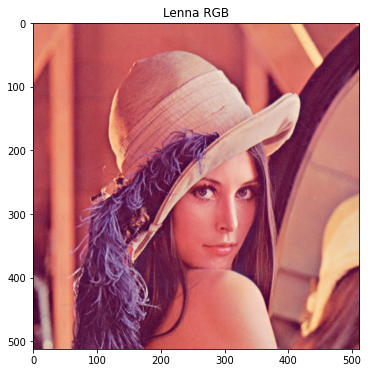

In [4]:
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("Lenna RGB")
plt.show()




In [5]:
# some image info:
print(type(img))
print(img.shape)
img




<class 'numpy.ndarray'>
(512, 512, 3)


array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

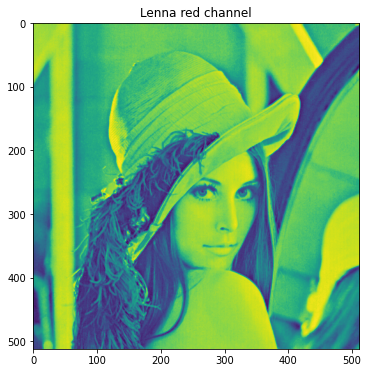

In [6]:
# show only red channel
plt.figure(figsize=figsize)
plt.imshow(img[:, :, 0])
plt.title("Lenna red channel")
plt.show()




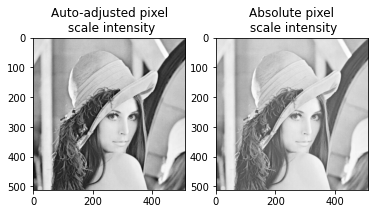

In [7]:
# gray color-mapping
fig, ax_arr = plt.subplots(1, 2, figsize=figsize)

ax_arr[0].imshow(img[:, :, 0], cmap="gray")
ax_arr[0].set_title("Auto-adjusted pixel\n scale intensity")

ax_arr[1].imshow(img[:, :, 0], cmap="gray", vmin=0, vmax=255)  # 255 is the max of uint8 type number (== 2**8 -1)
ax_arr[1].set_title("Absolute pixel\n scale intensity")
plt.show()



## More advanced functions



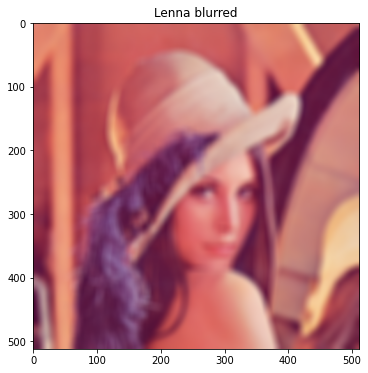

In [8]:
# image blurring
img_blurred = cv2.GaussianBlur(img, (15, 15), 7)  # use a 15x15 Gaussian kernel with standard deviation 7
plt.figure(figsize=figsize)
plt.imshow(img_blurred)
plt.title("Lenna blurred")
plt.show()



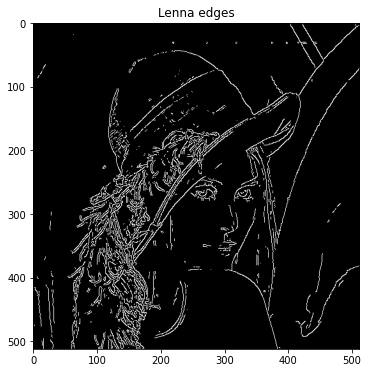

In [9]:
# edge detection
img_canny = cv2.Canny(img, 180, 200)  # end args are the lower & upper TH of hysteresis
plt.figure(figsize=figsize)
plt.imshow(img_canny, cmap="gray")
plt.title("Lenna edges")
plt.show()



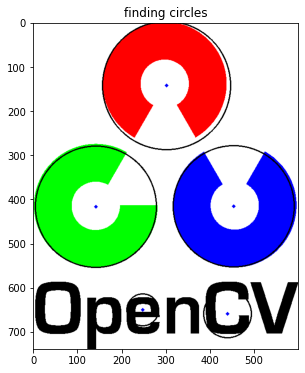

In [10]:
# detect circles

img = cv2.imread("opencv_logo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 0.1, 50, param1=50, param2=38)

for x, y, r in circles[0, :]:
    # draw the outer circle
    cv2.circle(img, (int(x), int(y)), int(r), (0, 0, 0), 2)
    # draw the center of the circle
    cv2.circle(img, (int(x), int(y)), 2, (0, 0, 255), 3)

plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("finding circles")
plt.show()

